# Global Sharks Analysis

## Load and explore the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pylab as plt
%matplotlib inline
pd.set_option("display.max_columns", None)

In [2]:
dataframe = pd.read_csv('../data/attacks.csv', encoding='ISO-8859-1') #Encoding to b
df=dataframe.copy()

To read correctly the CSV, it is necessary to specify the encoding latin1 (ISO-8859-1)

In [3]:
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


*Change col names to access better to the data*

In [4]:
df.columns=[c.lower().replace(' ', '_') for c in df.columns]
df.columns=[c.lower().replace('.', '_') for c in df.columns]
df.columns=[c.lower().replace(':', '') for c in df.columns]
df.columns=[c.lower().replace('/', 'O') for c in df.columns]
df.columns=[c.lower().replace('(', '') for c in df.columns]
df.columns=[c.lower().replace(')', '') for c in df.columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_number             8702 non-null   object 
 1   date                    6302 non-null   object 
 2   year                    6300 non-null   float64
 3   type                    6298 non-null   object 
 4   country                 6252 non-null   object 
 5   area                    5847 non-null   object 
 6   location                5762 non-null   object 
 7   activity                5758 non-null   object 
 8   name                    6092 non-null   object 
 9   sex_                    5737 non-null   object 
 10  age                     3471 non-null   object 
 11  injury                  6274 non-null   object 
 12  fatal_yon               5763 non-null   object 
 13  time                    2948 non-null   object 
 14  species_                3464 non-null 

In [6]:
df.rename(columns = {'sex_':'sex', 'species_':'species'}, inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_number             8702 non-null   object 
 1   date                    6302 non-null   object 
 2   year                    6300 non-null   float64
 3   type                    6298 non-null   object 
 4   country                 6252 non-null   object 
 5   area                    5847 non-null   object 
 6   location                5762 non-null   object 
 7   activity                5758 non-null   object 
 8   name                    6092 non-null   object 
 9   sex                     5737 non-null   object 
 10  age                     3471 non-null   object 
 11  injury                  6274 non-null   object 
 12  fatal_yon               5763 non-null   object 
 13  time                    2948 non-null   object 
 14  species                 3464 non-null 

All the columns except 'year and original order' have object dtype. This should be corrected.

In [8]:
df.shape #The datafram has 24 columns and 25723 rows

(25723, 24)

### REVIEW 1. Correct the data types

#### 1.1 Categorical types 

In [9]:
cat_df=df.select_dtypes(include='object')

cat_df.columns

Index(['case_number', 'date', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal_yon', 'time',
       'species', 'investigator_or_source', 'pdf', 'href_formula', 'href',
       'case_number_1', 'case_number_2', 'unnamed_22', 'unnamed_23'],
      dtype='object')

In [10]:
df.head()

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_yon,time,species,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed_22,unnamed_23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


The columns `unnamed_22` & `unnamed_23` seem to have irrelevant information as its header is "unnamed".
Let's check which values are and how we can correct them

In [11]:
df.unnamed_23.unique()

array([nan, 'Teramo', 'change filename'], dtype=object)

In [12]:
df.unnamed_22.unique()

array([nan, 'stopped here'], dtype=object)

The restrictions for the project are that none of the columns should be erased. So we are going to replace these values by 'unknown'

In [13]:
df['unnamed_22'] = 'unknown'
df['unnamed_23'] = 'unknown'

In [14]:
print(df.unnamed_22.unique(), df.unnamed_23.unique())

['unknown'] ['unknown']


**********************************

### 2. Null values

Now, let's check the null values of the dataset and how we can explore them.

In [15]:
nan_cols=df.isna().sum()

nan_cols[nan_cols>0]

case_number               17021
date                      19421
year                      19423
type                      19425
country                   19471
area                      19876
location                  19961
activity                  19965
name                      19631
sex                       19986
age                       22252
injury                    19449
fatal_yon                 19960
time                      22775
species                   22259
investigator_or_source    19438
pdf                       19421
href_formula              19422
href                      19421
case_number_1             19421
case_number_2             19421
original_order            19414
dtype: int64

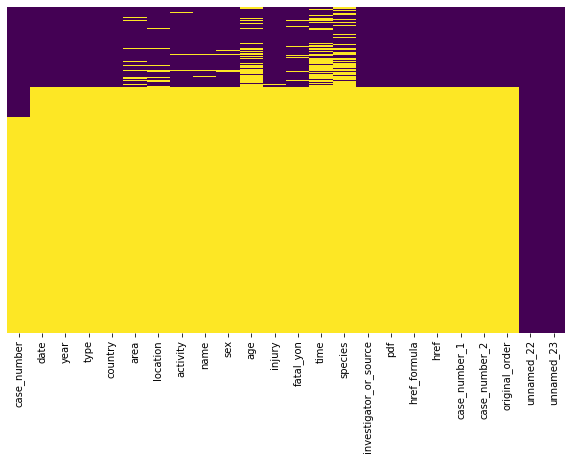

In [16]:
plt.figure(figsize=(10, 6))

sns.heatmap(df.isna(),
            yticklabels=False,
            cmap='viridis',
            cbar=False)

plt.show()

All the yellow values of the heatmap are null values. We have to decide what to do in each column in order to clean up the data for the analysis. The yellow are is big so I'm going to erase the rows that have more than 18 null columns 

In [17]:
quantity_of_nulls = 18
df.iloc[df[(df.isnull().sum(axis=1)>quantity_of_nulls)].index]
df = df.drop(df[df.isnull().sum(axis=1) > 18].index)

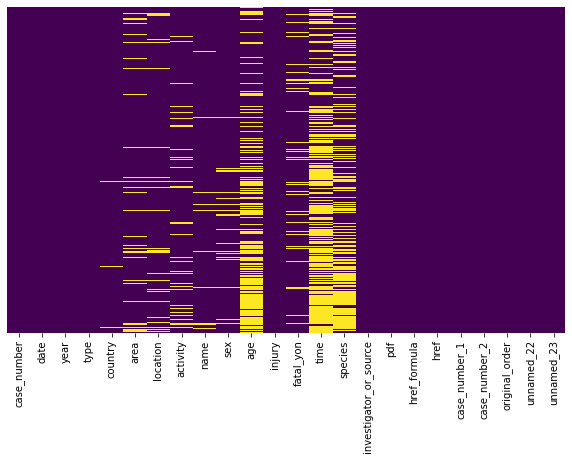

In [18]:
plt.figure(figsize=(10, 6))

sns.heatmap(df.isna(),
            yticklabels=False,
            cmap='viridis',
            cbar=False)

plt.show()

In [19]:
df.shape

(6302, 24)

Now, the dataset has a **24,5%** of the original data. In other words, the rows with more than **18 of 24** null values are the **76,5%** of the original data.

In [20]:
nan_cols=df.isna().sum()
nan_cols[nan_cols>0]

case_number                  1
year                         2
type                         4
country                     50
area                       455
location                   540
activity                   544
name                       210
sex                        565
age                       2831
injury                      28
fatal_yon                  539
time                      3354
species                   2838
investigator_or_source      17
href_formula                 1
dtype: int64

For our insights, we need the columns `'year', 'country', 'time', 'species' , 'age'` .So, if the rows in this coolumns are null, we will drop them.

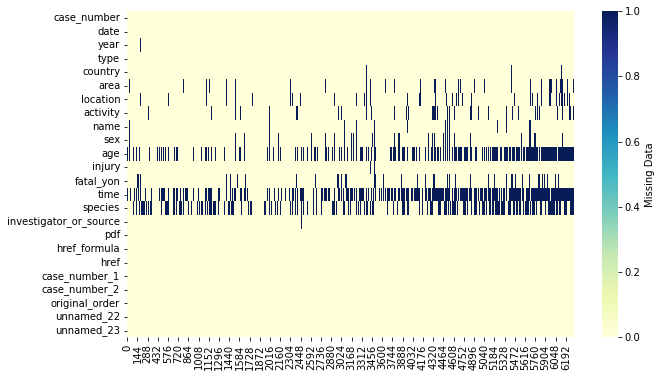

In [21]:
plt.figure(figsize=(10, 6))

sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

plt.show()

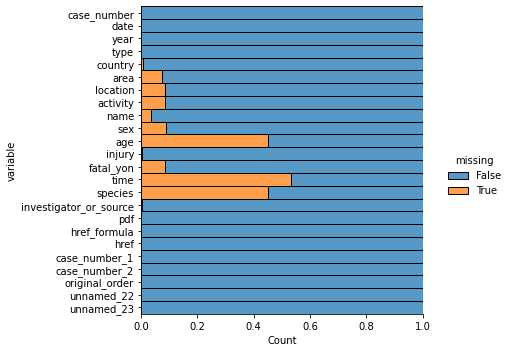

In [22]:
sns.displot(data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25)

plt.show()

In [23]:
As we can see, the columns age, time and species are the ones with 

SyntaxError: invalid syntax (309585537.py, line 1)

##### Age - Time - Species
The null values that converge in the three columns

In [40]:
indices_to_drop = list()
for index, row in df.iterrows():
        if (pd.isnull(row["age"]) or pd.isna(row["age"]) or row["age"] == " ") and \
                (pd.isnull(row["time"]) or pd.isna(row["time"]) or row[
                    "time"] == " ") and \
                (pd.isnull(row["species"]) or pd.isna(row["species"]) or row["species"] == ""): 
            indices_to_drop.append(index)
df.drop(labels=indices_to_drop, inplace=True)

##### Age - Time
The null values that converge in both columns 

In [41]:
indices_to_drop = list()
for index, row in df.iterrows():
        if (pd.isnull(row["age"]) or pd.isna(row["age"]) or row["age"] == " ") and \
                (pd.isnull(row["time"]) or pd.isna(row["time"]) or row[
                    "time"] == " "): 
            indices_to_drop.append(index)
df.drop(labels=indices_to_drop, inplace=True)

##### Age - Species
The null values that converge in both columns 

In [42]:
indices_to_drop = list()
for index, row in df.iterrows():
        if (pd.isnull(row["age"]) or pd.isna(row["age"]) or row["age"] == " ") and \
                (pd.isnull(row["species"]) or pd.isna(row["species"]) or row[
                    "species"] == " "): 
            indices_to_drop.append(index)
df.drop(labels=indices_to_drop, inplace=True)

##### Time - Species
The null values that converge in both columns 

In [43]:
indices_to_drop = list()
for index, row in df.iterrows():
        if (pd.isnull(row["time"]) or pd.isna(row["time"]) or row["time"] == " ") and \
                (pd.isnull(row["species"]) or pd.isna(row["species"]) or row[
                    "species"] == " "): 
            indices_to_drop.append(index)
df.drop(labels=indices_to_drop, inplace=True)

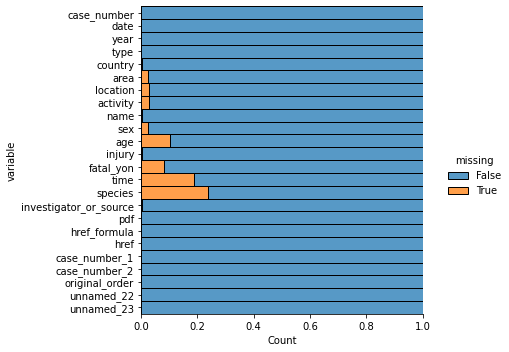

In [44]:
sns.displot(data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25)

plt.show()

In [45]:
df.shape

(3311, 24)

In [46]:
nan_cols=df.isna().sum()
nan_cols[nan_cols>0]

year                        1
country                     7
area                       80
location                   90
activity                   96
name                       15
sex                        84
age                       336
injury                      5
fatal_yon                 269
time                      619
species                   783
investigator_or_source      4
dtype: int64

In [48]:
index_species=df[df['species'].isna()].index
index_species

Int64Index([   1,    2,    9,   12,   29,   41,   54,   61,   69,   70,
            ...
            5844, 5934, 5952, 5958, 5963, 5991, 6077, 6114, 6160, 6241],
           dtype='int64', length=783)

In [49]:
df['species'].isnull().sum()

783

In [54]:
df['species'].value_counts()

White shark                                           118
Shark involvement not confirmed                        67
Shark involvement prior to death was not confirmed     54
Invalid                                                52
Tiger shark                                            51
                                                     ... 
Bull shark, 132-kg [291-lb]                             1
Raggedtooth shark, 3.5 m [11.5']                        1
Questionable Incident                                   1
Tiger shark, 4 m [13']  ?                               1
12' tiger shark                                         1
Name: species, Length: 1218, dtype: int64

In [ ]:
nan_cols=df.isna().sum()
nan_cols[nan_cols>0]

In [ ]:
df.shape

In [ ]:
nan_cols=df.isna().sum()
nan_cols[nan_cols>0]

In [ ]:
df

We are going to check the columns that have more yellow of the graphic: `'age', 'time', 'species'`.  But we need to compare which one has more null values. 

In [ ]:
nan_cols=df[['age','time','species']].isna().sum()

nan_cols[nan_cols>0]

##### Column `time`

In [ ]:
#Search total null values 
df['time'].isnull().sum()

In [ ]:
df.time.unique()

There are many values that:
1. they don't say what exact hour is (evening, daybreak, etc)
2. range of hours
3. Sentences out of context



In [ ]:
df = df.drop(df[df.isnull().sum(axis=1) > 7.index)

##### Column `age`

In [ ]:
#Search total null values 
df['age'].isnull().sum()

In [ ]:
counts = df.age.value_counts()  
counts

In [ ]:
df.age.unique() 

There are many values that:
1. are not numbers (e.g '9 months', 'teens', 'young', etc)
2. are regex char (e.g '\xa0')

Depend on the case, there will be erased or replaced

In [ ]:
df[df['age']=='18 months'].index.values

---------------------------------

##### Exploración columna `case_number`

In [ ]:
df[df['case_number'].notnull()]

The case_number column shows the date but formatted, in the values that is okey. 

In [ ]:
df.loc[dataframe['case_number'] > 0]

In [ ]:
df.type.unique()